Plotting the sFits here, to keep a common style. Quick and dirty for now!

In [238]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib_hep import histpoints, make_split

import ROOT

import root_numpy
from root_pandas import read_root, to_root

In [168]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

In [3]:
filename = '/net/storage03/data/users/kheinicke/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2012_MD_kheinick_selected.root'

In [180]:
gauss_mean = 5.28079e+03
gauss_sigma1 = 7.51820e+00
gauss_sigma2 = 1.30667e+01
gauss_sigma3 = 1.08771e+01
exponent = -9.70116e-04
nbkg = 1.02693e+06
nsig = 5.03118e+05
fracg1g2 = 6.02363e-01
fracg2g3 = 1.02142e+00


In [181]:
exp_norm = stats.expon.cdf([5230, 5330], 5230, -1 / exponent)
exp_norm = exp_norm[1] - exp_norm[0]

In [182]:
cs = [c['color'] for c in plt.rcParams['axes.prop_cycle']]

In [197]:
(1 - fracg1g2) * fracg1g2 + (1 - fracg1g2) * ((1 - fracg1g2) * fracg1g2) + fracg1g2

0.9371275526716462

In [268]:
stats.expon.cdf(list((0, 1)), 0, 100)

array([ 0.        ,  0.00995017])

In [297]:
def plotting_function(x, mean, exp, sigma1, sigma2, sigma3, nsig, nbkg, c1, c2, range=(5230, 5330)):
    normvals = stats.expon.cdf(list(range), range[0], -1 / exp)
    exp_norm = normvals[1] - normvals[0]
    return (
        c1 * nsig * stats.norm.pdf(x, gauss_mean, sigma1)
        + (1 - c1) * c2 * nsig * stats.norm.pdf(x, gauss_mean, sigma2)
        + (1 - c1) * (1 - c2) * nsig * stats.norm.pdf(x, gauss_mean, sigma2)
        + nbkg / exp_norm * stats.expon.pdf(x, range[0], -1 / exp)
    )

In [321]:
(1 - fracg1g2) * (1 - fracg2g3)

-0.008517384539999999

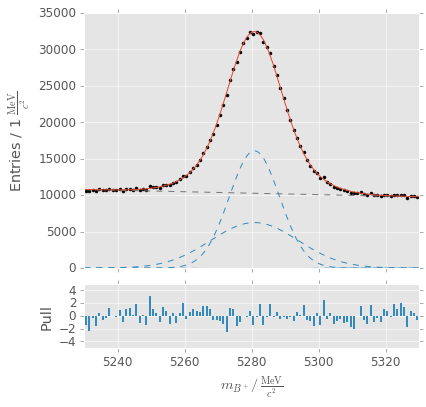

In [323]:
plt.figure(figsize=(6, 6))
ax_top, ax_bottom = make_split(0.8, 0.1)
plt.sca(ax_top)
hist, edges = np.histogram(df.B_LOKI_MASS_JpsiConstr_NoPVConstr, range=(5230, 5330), bins=100)
width = (edges[1] - edges[0])
bin_content = np.sum(hist * width)
scale = bin_content / (nsig + nbkg)
x = edges[:-1] + (edges[1:] - edges[:-1]) / 2
y = hist
plt.plot(x, y, 'k.')
xs = np.linspace(5230, 5330, 200)
g1, g2, g3, exp = (
    scale * fracg1g2 * nsig * stats.norm.pdf(xs, gauss_mean, gauss_sigma1),
    scale * (1 - fracg1g2) * fracg2g3 * nsig * stats.norm.pdf(xs, gauss_mean, gauss_sigma2),
    scale * (1 - fracg1g2) * (1 - fracg2g3) * nsig * stats.norm.pdf(xs, gauss_mean, gauss_sigma3),
    scale * nbkg / exp_norm * stats.expon.pdf(xs, 5230, -1 / exponent)
)

fun = lambda a: plotting_function(a, gauss_mean, exponent, gauss_sigma1, gauss_sigma2, gauss_sigma3,
                                  nsig, nbkg, fracg1g2, fracg2g3)

plt.plot(xs, g1, '--', color=cs[1])
plt.plot(xs, g2, '--', color=cs[1])
plt.plot(xs, g3, '--', color=cs[1])
plt.plot(xs, exp, '--', color=cs[3])
plt.plot(xs, scale * fun(xs))
plt.ylabel(r'Entries / {:.0f} $\frac{{\mathrm{{MeV}}}}{{c^2}}$'.format(width))
plt.ylim(0, 35000)
plt.xlim(5230, 5330)

plt.sca(ax_bottom)
res = y - scale * fun(x)
errs = np.sqrt(y)
pulls = res / errs
plt.vlines(x, 0, pulls, lw=2, color=cs[1])
plt.ylabel('Pull')
plt.xlabel(r'$m_{B^+} /\,\frac{\mathrm{MeV}}{c^2}$')
plt.ylim(-5, 5)

plt.savefig('build/massfit-2012-md.pdf', bbox_inches='tight')
plt.show()